<a href="https://colab.research.google.com/github/Rekkice/ADA-Informes/blob/main/Informe11_TopologicalSorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de orden topológico
Entrada: Grafo dirigido sin ciclos.

Salida: Un orden de los vértices del grafo en donde se cumple para cada arco (v, w) que f(v) < f(w).

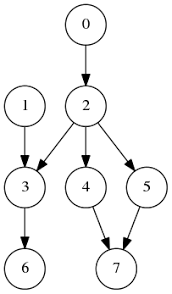

El problema de ordenamiento topológico consiste en encontrar un orden lineal de los vertices de un grafo tal que para cada camino desde $v$ a $w$, $v$ siempre esté antes de $w$. Por ejemplo, si una lista de tareas y algunas de las tareas se deben realizar antes de otras, un orden topológico sería una secuencia válida para las tareas.

# 2.1 Descripción del algoritmo
## Usando DFS postorden iterativo
1. Se crea una lista para guardar el orden topológico.
2. Se usa DFS para recorrer el grafo y agregar nodos a la lista luego de ser descubiertos y visitados.
3. Se invierte el orden de la lista y se retorna.

## Usando DFS postorden recursivo
1. Se crea una pila para guardar el orden topológico.
2. Se llama DFS para cada nodo adyacente.
3. Se agrega el nodo a la pila y se retorna.

# 2.2 Código

In [1]:
#@title Generador de instancias
from collections import defaultdict
import math
import random
import networkx as nx

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph

In [38]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

def ordenTopologicoIter(arbol, verbose = False, visualize = False, ciclos = None):
    if type(arbol) != nx.DiGraph: arbol = graph_to_nxdigraph(arbol)
    state = dict()
    lista = []

    for n in arbol:
        if verbose: print(f"recorriendo nodo {n}")
        S=[n] # se inicializa stack con nodo n
        while len(S)>0:
            n=S.pop()
            if ciclos: ciclos[0] += 1
            if n not in state: #primera pasada
                if verbose: print(f"nodo {n} descubierto, agregando nodos adyacentes a stack")
                state[n]="descubierto"
                S.append(n)

                for adj in reversed(list(arbol[n])):
                    if adj not in state: S.append(adj)
                    
            elif state[n]=="descubierto": #segunda pasada
                state[n] ="visitado"
                if verbose: print(f"nodo {n} visitado y agregado a la lista"); print()
                lista.append(n)

        if verbose: print()

    lista.reverse()
    if visualize:
        arbol = nx.DiGraph()
        for i in range(len(lista)-1):
            arbol.add_edge(lista[i], lista[i+1])
        nx.draw(arbol, with_labels=True)
    return lista

In [39]:
def ordenRecursivo(arbol, nodo, visitados, stack, verbose, visualize, llamadas):
    if verbose: print(f"Se visita nodo {nodo}")
    visitados[nodo] = True
    for adj in reversed(list(arbol[nodo])):
        if llamadas: llamadas[0] += 1
        if adj not in visitados:
            if verbose: print(f"Nodo adyacente {adj} no ha sido visitado. Llamando ordenRecursivo()")
            ordenRecursivo(arbol, adj, visitados, stack, verbose, visualize, llamadas)
    stack.append(nodo)

def ordenTopologicoRecur(arbol, verbose = False, visualize = False, llamadas = None):
    if type(arbol) != nx.DiGraph: arbol = graph_to_nxdigraph(arbol)
    visitados = dict()
    stack = []
    if verbose: print(f"Se inicializa función recursiva ordenTopologicoRecur()")

    for n in arbol: # DFS recursivo
        if llamadas: llamadas[0] += 1
        if n not in visitados:
            ordenRecursivo(arbol, n, visitados, stack, verbose, visualize, llamadas)
    stack.reverse()
    if visualize:
        arbol = nx.DiGraph()
        for i in range(len(stack)-1):
            arbol.add_edge(stack[i], stack[i+1])
        nx.draw(arbol, with_labels=True)
    return stack

# 2.3 Ejecución paso a paso

recorriendo nodo 5
nodo 5 descubierto, agregando nodos adyacentes a stack
nodo 2 descubierto, agregando nodos adyacentes a stack
nodo 0 descubierto, agregando nodos adyacentes a stack
nodo 9 descubierto, agregando nodos adyacentes a stack
nodo 6 descubierto, agregando nodos adyacentes a stack
nodo 6 visitado y agregado a la lista

nodo 9 visitado y agregado a la lista

nodo 7 descubierto, agregando nodos adyacentes a stack
nodo 7 visitado y agregado a la lista

nodo 0 visitado y agregado a la lista

nodo 2 visitado y agregado a la lista

nodo 3 descubierto, agregando nodos adyacentes a stack
nodo 4 descubierto, agregando nodos adyacentes a stack
nodo 4 visitado y agregado a la lista

nodo 3 visitado y agregado a la lista

nodo 5 visitado y agregado a la lista


recorriendo nodo 2

recorriendo nodo 3

recorriendo nodo 1
nodo 1 descubierto, agregando nodos adyacentes a stack
nodo 1 visitado y agregado a la lista


recorriendo nodo 0

recorriendo nodo 4

recorriendo nodo 9

recorriendo no

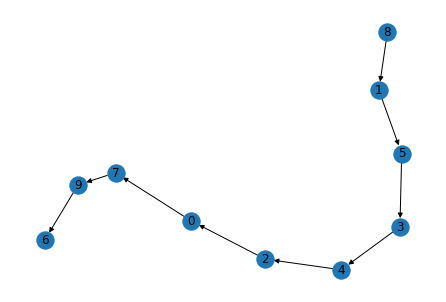

In [4]:
arbol = graph_to_nxdigraph(graph_instance_creator(10))
print(ordenTopologicoIter(arbol, True, True))
print(); print()
print(ordenTopologicoRecur(arbol, True))

#3. Tiempo de ejecución

El algoritmo tiene un tiempo de ejecución de $O(V+E)$ donde *V* representa la cantidad de nodos (o vertices) y *E* representa a los arcos entre ellos.

## Prueba del Teorema

Esto se puede comprobar de la siguiente manera:
1.  El algoritmo ingresa únicamente una vez a cada vertice al stack, lo cuál nos da una complejida de $O(V)$

2.  Por cada vertice, el algoritmo recorre una única vez sus conexiones, lo que finalmente nos da que su complejidad es de $O(E)$

Si juntamos estas complejidades nos da que la complejidad total (o tiempo de ejecución) del algoritmo es de $O(V+E)$

#4. Correctitud

La correctitud de este algoritmo puede ser explicada de forma similar a la del DFS, puesto que su implementación es similar.

El algoritmo llamará a cada vértice una única vez, puesto que al momento de llamar a este se le colocará una etiqueta para indicar que ya fue analizado. Provocando que cada vértice tenga una etiqueta distinta que va desde *1* hasta *n*, siendo *n* la cantidad de vértices totales.

##Prueba del teorema:

Caso base (n = 1): si el grafo recibido tiene únicamente un nodo, el orden topológico será iguál a 1.

Caso 1: si *V* se descubre antes que *W*, se tiene que *V* se llama como nodo inicial antes de que *W* se marque como explorado. Como *W* es alcanzable desde *V* y se llama recursivamente en *W*, debido al funcionamiento *LIFO* de las llamadas recursivas, la llamada en *W* se completa antes que la de *V*, por lo que según la etiqueta *f(w) > f(v)*.

Caso 2: supongamos que *W* es descubierto antes que *V*, como *G* es un grafo *DAG* no hay camino de *W* a *v*, por otro lado, combinar este camino con el arco *(V,W)* produciría un ciclo directo. Por lo que esta termina con *V* como inexplorado, nuevamente esto produce que la llamada en W se complete antes, y que se mantenga que *f(W) > f(V)*.


#5. Experimentos
## Tiempos de ejecución de los 2 algoritmos
El siguiente experimento busca comparar los tiempos de ejecución de los algoritmos de orden topológico iterativo y recursivo.

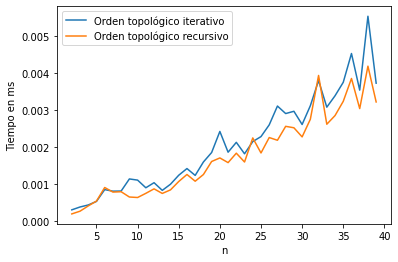

In [8]:
#@title Código gráfica
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y1 = []
y2 = []

for n in range(2, 40):
  arbol = dict(graph_instance_creator(n))

  t1 = repeat(setup="from __main__ import ordenTopologicoIter", stmt=f"ordenTopologicoIter({arbol})", repeat = 1, number = 10)
  t2 = repeat(setup="from __main__ import ordenTopologicoRecur", stmt=f"ordenTopologicoRecur({arbol})", repeat = 1, number = 10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["Orden topológico iterativo", "Orden topológico recursivo"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis
Como se probó anteriormente, ambos algoritmos tienen la misma complejidad temporal $O(V+E)$, por lo tanto, sus tiempos de ejecución crecen a la misma razón. Pero se puede observar que el tiempo del algoritmo iterativo es generalmente mayor al del recursivo, porque su constante es mayor.

## Llamadas recursivas y ciclos
El siguiente experimento compara la cantidad de llamadas recursivas y ciclos que realiza el algoritmo recursivo, con la cantidad de ciclos que realiza el algoritmo iterativo mientras el stack no está vacío.

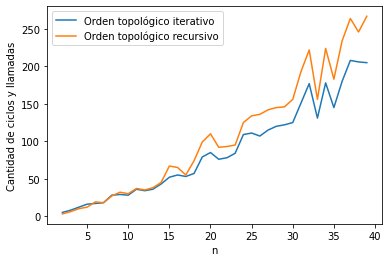

In [36]:
#@title Código gráfica
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y1 = []
y2 = []

for n in range(2, 40):
  arbol = dict(graph_instance_creator(n))

  ciclos = [0]
  llamadas = [0]

  ordenTopologicoIter(arbol, False, False, ciclos)
  ordenTopologicoRecur(arbol, False, False, llamadas)

  x.append(n)
  y1.append(ciclos)
  y2.append(llamadas)

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["Orden topológico iterativo", "Orden topológico recursivo"])

plt.xlabel('n')
plt.ylabel('Cantidad de ciclos y llamadas')
plt.show()

## Análisis
El algoritmo recursivo realiza más iteraciones y llamadas que el iterativo. Esto puede ser debido a la forma en que se contó en cada algoritmo. Por ejemplo, si se pone el contador en el bloque de la primera pasada del iterativo, y el otro en la primera linea de la llamada, la cantidad es exactamente la misma.

In [51]:
#@title Algoritmos con contador modificado
def ordenTopologicoIter2(arbol, ciclos = None):
    if type(arbol) != nx.DiGraph: arbol = graph_to_nxdigraph(arbol)
    state = dict()
    lista = []

    for n in arbol:
        S=[n] # se inicializa stack con nodo n
        while len(S)>0:
            n=S.pop()
            if n not in state: #primera pasada
                if ciclos: ciclos[0] += 1
                state[n]="descubierto"
                S.append(n)

                for adj in reversed(list(arbol[n])):
                    if adj not in state: S.append(adj)
                    
            elif state[n]=="descubierto": #segunda pasada
                state[n] ="visitado"
                lista.append(n)

    lista.reverse()
    return lista

def ordenRecursivo2(arbol, nodo, visitados, stack, llamadas):
    if llamadas: llamadas[0] += 1
    visitados[nodo] = True
    for adj in reversed(list(arbol[nodo])):
        if adj not in visitados:
            ordenRecursivo2(arbol, adj, visitados, stack, llamadas)
    stack.append(nodo)

def ordenTopologicoRecur2(arbol, llamadas = None):
    if type(arbol) != nx.DiGraph: arbol = graph_to_nxdigraph(arbol)
    visitados = dict()
    stack = []

    for n in arbol: # DFS recursivo
        if n not in visitados:
            ordenRecursivo2(arbol, n, visitados, stack, llamadas)
    stack.reverse()
    return stack

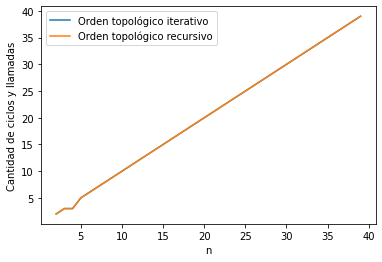

In [52]:
#@title Código gráfica
x = []
y1 = []
y2 = []

for n in range(2, 40):
  arbol = dict(graph_instance_creator(n))

  ciclos = [0]
  llamadas = [0]

  ordenTopologicoIter2(arbol, ciclos)
  ordenTopologicoRecur2(arbol, llamadas)

  x.append(n)
  y1.append(ciclos)
  y2.append(llamadas)

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["Orden topológico iterativo", "Orden topológico recursivo"])

plt.xlabel('n')
plt.ylabel('Cantidad de ciclos y llamadas')
plt.show()

Por lo tanto, se concluye que es difícil comparar ambas métricas de manera significativa, pero se mantiene que su cantidad de operaciones se acerca a $O(V+E)$.